# Exploratory Data Analysis
Examine (by hand or collecting simple statistics) the train dataset and try to infer general rules that are right in most cases, even if they seldom apply (high precision, low recall).

In [26]:
import sys
from os import listdir
import xml.etree.ElementTree as ET
import string
import pandas as pd
import matplotlib.pyplot as plt
import collections

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
datadir = "/Users/mponsclo/Downloads/labAHLT/data/train"
#datadir = "../labAHLT/data/train"
df = pd.DataFrame() # initialize Data Frame

for f in listdir(datadir):
        try:
            filename = datadir + "/" + f
            tree = ET.parse(filename) # Some file rose an error when parsing
            root = tree.getroot()
        
            for elem in root:
                for subelem in elem.findall('entity'):
                    aux_df = pd.DataFrame({'Name': subelem.get('text'), 'Type': subelem.get('type')}, index=[0])
                    df = df.append(aux_df)
        except:
            continue

In [3]:
print(f'Total DF rows: {df.shape[0]}')
print('Number of rows with UPPERCASE: {}'.format(df['Name'].str.isupper().sum()))
print('Number of rows with Title Case: {}'.format(df['Name'].str.istitle().sum()))
print('Number of rows containing numbers: {}'.format(df.shape[0] - df['Name'].str.isalpha().sum()))

Total DF rows: 11627
Number of rows with UPPERCASE: 963
Number of rows with Title Case: 1781
Number of rows containing numbers: 2071


In [6]:
# Analysis of Types

group = df[df["Type"] == "group"]
brand = df[df["Type"] == "brand"]
drug = df[(df["Type"]=='drug')]
drug_n = df[df["Type"]== "drug_n"]

group_counts = pd.DataFrame({'Count' : group['Name'].value_counts()})
brand_counts = pd.DataFrame({'Count' : brand['Name'].value_counts()})
drug_counts = pd.DataFrame({'Count' : drug['Name'].value_counts()})
drug_n_counts = pd.DataFrame({'Count' : drug_n['Name'].value_counts()})

print(drug_n_counts.head(10))

                                              Count
PCP                                              22
18-MC                                            16
ibogaine                                         14
1-methyl-4-phenyl-1,2,3,6-tetrahydropyridine     13
MHD                                              12
endotoxin                                        11
dmPGE2                                           10
beta-endorphin                                    9
toxin A                                           9
ginsenosides                                      8


In [7]:
# Convert index to column for visual analysis

drug_counts['Name'] = drug_counts.index
drug_counts = drug_counts[["Name", "Count"]]

drug_n_counts['Name'] = drug_n_counts.index
drug_n_counts = drug_n_counts[["Name", "Count"]]

group_counts['Name'] = group_counts.index
group_counts = group_counts[["Name", "Count"]]

brand_counts['Name'] = brand_counts.index
brand_counts = brand_counts[["Name", "Count"]]

# Save files for inspection
#drug_counts.to_csv(r'/Users/mponsclo/Desktop/Drug_count.csv', index = False)
#drug_n_counts.to_csv(r'/Users/mponsclo/Desktop/Drug_n_count.csv', index = False)
#group_counts.to_csv(r'/Users/mponsclo/Desktop/Group_count.csv', index = False)
#brand_counts.to_csv(r'/Users/mponsclo/Desktop/Brand_count.csv', index = False)

#print(drug['Name'].str.isupper().sum())

Text(0.5, 0, '')

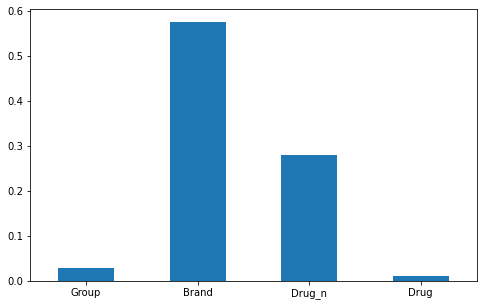

In [9]:
# UPPERCASE TERMS
df2 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [group['Name'].str.isupper().sum()/group.shape[0],
                                                                            brand['Name'].str.isupper().sum()/brand.shape[0],
                                                                            drug_n['Name'].str.isupper().sum()/drug_n.shape[0],
                                                                            drug['Name'].str.isupper().sum()/drug.shape[0]]})

ax = df2.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

#print(group['Name'].str.isupper().sum()/group.shape[0])
#print(brand['Name'].str.isupper().sum()/brand.shape[0])
#print(drug_n['Name'].str.isupper().sum()/drug_n.shape[0])
#print(drug['Name'].str.isupper().sum())

Text(0.5, 0, '')

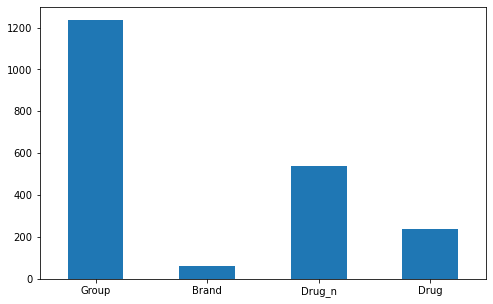

In [10]:
# WORDS CONTAINING NON ALPHABETIC CHARACTERS
#print(group.shape[0] - group['Name'].str.isalpha().sum())
#print(brand.shape[0] - brand['Name'].str.isalpha().sum())
#print(drug.shape[0] - drug['Name'].str.isalpha().sum())
#print(drug_n.shape[0] - drug_n['Name'].str.isalpha().sum())

df3 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [group.shape[0] - group['Name'].str.isalpha().sum(),
                                                                            brand.shape[0] - brand['Name'].str.isalpha().sum(),
                                                                            drug.shape[0] - drug['Name'].str.isalpha().sum(),
                                                                            drug_n.shape[0] - drug_n['Name'].str.isalpha().sum()]})

ax = df3.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

0.10014892032762472


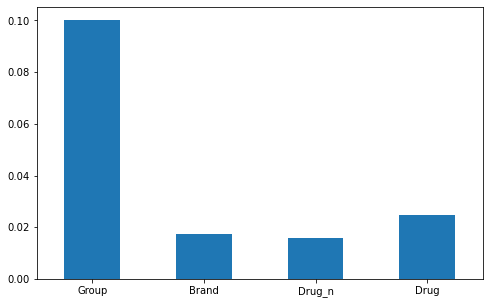

In [11]:
# PRESENCE OF DIGITS
df4 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [(group['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/group.shape[0],
                                                                            (brand['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/brand.shape[0],
                                                                            (drug['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/drug.shape[0],
                                                                            (drug_n['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/drug.shape[0]]})

ax = df4.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

print((group['Name'].apply(lambda word: 1 if True in [t in string.digits or t == '-' for t in word] else 0).sum())/group.shape[0])

0.4426656738644825


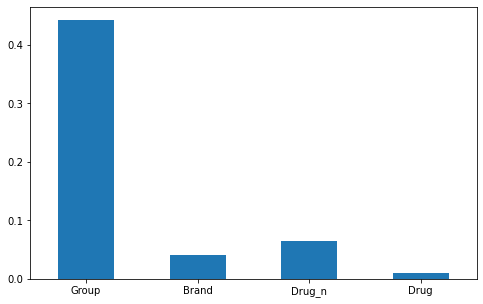

In [18]:
# PRESENCE OF SPACES
df5 = pd.DataFrame({'lab' : ['Group', 'Brand', 'Drug_n', 'Drug'], 'Count' : [(group['Name'].apply(lambda word: 1 if True in [t == ' ' for t in word] else 0).sum())/group.shape[0],
                                                                            (brand['Name'].apply(lambda word: 1 if True in [ t == ' ' for t in word] else 0).sum())/brand.shape[0],
                                                                            (drug['Name'].apply(lambda word: 1 if True in [t == ' ' for t in word] else 0).sum())/drug.shape[0],
                                                                            (drug_n['Name'].apply(lambda word: 1 if True in [t  == ' ' for t in word] else 0).sum())/drug.shape[0]]})

ax = df5.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")
print((group['Name'].apply(lambda word: 1 if True in [t == ' ' for t in word] else 0).sum())/group.shape[0])

#### Top Count Entities 

In [12]:
#ax = drug_counts[(drug_counts["Count"] > 35)].plot.bar()
#ax0 = drug_n_counts[(drug_n_counts["Count"] > 6)].plot.bar(rot = 90)
#ax1 = group_counts[(group_counts["Count"] > 25)].plot.bar(rot = 45)
#ax2 = brand_counts[(brand_counts["Count"] > 13)].plot.bar(rot = 0)

### Count Suffixes and Prefixes

In [50]:
def get_n_suffixes(df, n_suffix, top, plot=False):
    array = df.values
    suffixes = [x[-n_suffix:] for x in array]
    w = collections.Counter(suffixes)
    lst = w.most_common(top)
    print(lst)
    
    if plot:
        df = pd.DataFrame(lst, columns = ['Word', 'Count'])
        df.plot.bar(x='Word', y='Count', rot = 0)

def get_n_prefixes(df, n_prefix, top, plot=False):
    array = df.values
    prefixes = [x[:n_prefix] for x in array]
    w = collections.Counter(prefixes)
    lst = w.most_common(top)
    print(lst)
    
    if plot:
        df = pd.DataFrame(lst, columns = ['Word', 'Count'])
        df.plot.bar(x='Word', y='Count', rot = 0)

### Drug DataFrame

In [54]:
get_n_suffixes(drug['Name'], 3, 20, plot = False)

[('ine', 1756), ('ide', 482), ('cin', 377), ('ole', 296), ('one', 295), ('rin', 282), ('ate', 271), ('ium', 230), ('tin', 208), ('xin', 178), ('oin', 177), ('vir', 141), ('cid', 138), ('hol', 107), ('nol', 101), ('lin', 98), ('lam', 96), ('tan', 78), ('lol', 73), ('pin', 71)]


In [53]:
get_n_suffixes(drug['Name'], 4, 20, plot = False)

[('dine', 307), ('pine', 285), ('zole', 283), ('mine', 265), ('arin', 241), ('line', 218), ('ycin', 198), ('mide', 190), ('rine', 184), ('toin', 177), ('oxin', 173), ('tine', 136), ('avir', 131), ('acin', 121), ('atin', 119), ('hium', 113), ('ride', 112), ('ohol', 105), ('olam', 96), ('done', 93)]


In [55]:
get_n_suffixes(drug['Name'], 5, 20, plot = False)

[('azole', 262), ('amine', 249), ('farin', 207), ('idine', 200), ('mycin', 198), ('ytoin', 174), ('goxin', 169), ('navir', 123), ('etine', 120), ('lline', 117), ('amide', 116), ('thium', 113), ('cohol', 105), ('zolam', 96), ('epine', 96), ('tatin', 93), ('ipine', 87), (' acid', 83), ('orine', 82), ('xacin', 72)]


In [56]:
get_n_prefixes(drug['Name'], 3, 20, plot = False)

[('phe', 213), ('met', 183), ('war', 171), ('dig', 147), ('pro', 137), ('flu', 127), ('ket', 115), ('the', 100), ('lit', 95), ('alc', 90), ('rif', 88), ('cyc', 87), ('car', 79), ('eth', 73), ('cim', 71), ('amp', 60), ('ery', 59), ('lev', 51), ('chl', 50), ('cis', 49)]


In [58]:
get_n_prefixes(drug['Name'], 4, 20, plot = False)

[('phen', 213), ('warf', 171), ('digo', 145), ('meth', 120), ('keto', 100), ('theo', 100), ('lith', 95), ('alco', 90), ('rifa', 88), ('cycl', 87), ('carb', 77), ('cime', 71), ('prop', 68), ('eryt', 59), ('fluv', 59), ('fluo', 50), ('chlo', 50), ('morp', 45), ('hydr', 43), ('Apre', 42)]


In [59]:
get_n_prefixes(drug['Name'], 5, 20, plot = False)

[('warfa', 171), ('pheny', 153), ('digox', 145), ('theop', 100), ('lithi', 95), ('ketoc', 91), ('alcoh', 90), ('cyclo', 87), ('cimet', 71), ('carba', 71), ('rifam', 67), ('eryth', 59), ('metho', 56), ('pheno', 50), ('chlor', 50), ('fluox', 49), ('morph', 45), ('fluvo', 43), ('Aprep', 42), ('dilti', 39)]


### Group DataFrame

In [62]:
get_n_suffixes(group['Name'], 3, 20, plot = False)
get_n_suffixes(group['Name'], 4, 20, plot = False)
get_n_suffixes(group['Name'], 5, 20, plot = False)

[('nts', 433), ('ics', 327), ('nes', 226), ('ors', 198), ('ids', 160), ('ugs', 117), ('ves', 106), ('ers', 91), ('tes', 89), ('ant', 76), ('des', 60), ('sts', 58), ('ins', 52), ('IDs', 50), ('tic', 40), ('oid', 32), ('tor', 30), ('ens', 30), ('ons', 25), ('TCA', 25)]
[('tics', 262), ('ants', 250), ('tors', 193), ('ines', 186), ('ents', 183), ('rugs', 117), ('oids', 109), ('ives', 106), ('ates', 88), ('kers', 73), ('ides', 60), ('ists', 58), ('cids', 51), ('AIDs', 50), ('lant', 39), ('ones', 39), ('sant', 32), ('gens', 30), ('etic', 28), ('itor', 27)]
[('gents', 180), ('itors', 176), ('sants', 150), ('etics', 134), ('otics', 113), ('drugs', 107), ('tives', 96), ('lants', 80), ('mines', 76), ('roids', 74), ('ckers', 73), ('rates', 67), ('nists', 58), ('acids', 51), ('SAIDs', 50), ('ulant', 39), ('zines', 38), ('pines', 36), ('ogens', 30), ('bitor', 27)]


In [63]:
get_n_prefixes(group['Name'], 3, 20, plot = False)
get_n_prefixes(group['Name'], 4, 20, plot = False)
get_n_prefixes(group['Name'], 5, 20, plot = False)

[('ant', 414), ('tri', 90), ('Ant', 76), ('cor', 65), ('bet', 64), ('MAO', 63), ('con', 60), ('diu', 60), ('NSA', 58), ('vit', 49), ('non', 44), ('phe', 41), ('bar', 41), ('thi', 39), ('ben', 37), ('hyp', 37), ('SSR', 37), ('cou', 33), ('TCA', 33), ('ACE', 32)]
[('anti', 363), ('tric', 89), ('cort', 64), ('beta', 64), ('diur', 60), ('cont', 59), ('NSAI', 58), ('Anti', 57), ('anta', 51), ('vita', 49), ('MAO ', 41), ('phen', 41), ('barb', 41), ('benz', 37), ('SSRI', 37), ('thia', 35), ('coum', 33), ('mono', 32), ('anes', 30), ('ACE ', 30)]
[('antic', 139), ('tricy', 89), ('antih', 73), ('corti', 64), ('diure', 60), ('contr', 59), ('NSAID', 58), ('antac', 51), ('vitam', 49), ('beta-', 43), ('antid', 41), ('barbi', 41), ('antib', 41), ('pheno', 39), ('benzo', 37), ('MAO i', 37), ('thiaz', 35), ('couma', 33), ('monoa', 32), ('anest', 30)]


### Brand DataFrame

In [64]:
get_n_suffixes(brand['Name'], 3, 20, plot = False)
get_n_suffixes(brand['Name'], 4, 20, plot = False)
get_n_suffixes(brand['Name'], 5, 20, plot = False)

[('rin', 67), ('CIN', 28), ('XOL', 25), ('SYS', 23), ('RON', 22), ('IVE', 21), ('OXX', 20), ('COR', 19), ('til', 18), ('DEX', 16), ('ase', 16), ('TIN', 16), ('tin', 15), ('tal', 15), ('OTM', 15), ('BEX', 15), ('VIL', 14), ('CEL', 14), ('DOL', 13), ('vec', 13)]
[('irin', 65), ('OCIN', 28), ('AXOL', 25), ('ASYS', 23), ('IOXX', 20), ('itil', 18), ('VIVE', 15), ('ROTM', 15), ('MBEX', 15), ('IVIL', 14), ('ptal', 14), ('YCEL', 14), ('ADOL', 13), ('IDEX', 13), ('evec', 13), ('ntin', 12), ('BLOC', 12), ('CRON', 11), ('OCOR', 11), ('UKIN', 11)]
[('pirin', 65), ('DOCIN', 28), ('TAXOL', 25), ('GASYS', 23), ('VIOXX', 20), ('xitil', 17), ('EVIVE', 15), ('TROTM', 15), ('IMBEX', 15), ('NIVIL', 14), ('eptal', 14), ('RYCEL', 14), ('RADOL', 13), ('VIDEX', 13), ('eevec', 13), ('IBLOC', 12), ('ACRON', 11), ('BOCOR', 11), ('EUKIN', 11), ('ontin', 10)]


In [65]:
get_n_prefixes(brand['Name'], 3, 20, plot = False)
get_n_prefixes(brand['Name'], 4, 20, plot = False)
get_n_prefixes(brand['Name'], 5, 20, plot = False)

[('asp', 51), ('IND', 28), ('TAX', 25), ('PEG', 24), ('VIO', 20), ('Mex', 17), ('AME', 16), ('Tri', 15), ('PRO', 15), ('NIM', 15), ('PRI', 14), ('Asp', 14), ('EQU', 14), ('Bez', 14), ('SPR', 14), ('COP', 13), ('TOR', 13), ('VID', 13), ('Gle', 13), ('Nov', 12)]
[('aspi', 51), ('INDO', 28), ('TAXO', 25), ('PEGA', 23), ('VIOX', 20), ('Mexi', 17), ('Tril', 15), ('AMEV', 15), ('NIMB', 15), ('PRIN', 14), ('Aspi', 14), ('EQUE', 14), ('Beza', 14), ('SPRY', 14), ('TORA', 13), ('VIDE', 13), ('Glee', 13), ('Novo', 12), ('BREV', 12), ('Maal', 11)]
[('aspir', 51), ('INDOC', 28), ('TAXOL', 25), ('PEGAS', 23), ('VIOXX', 20), ('Mexit', 17), ('AMEVI', 15), ('NIMBE', 15), ('PRINI', 14), ('Aspir', 14), ('Trile', 14), ('EQUET', 14), ('Bezal', 14), ('SPRYC', 14), ('TORAD', 13), ('VIDEX', 13), ('Gleev', 13), ('BREVI', 12), ('Maalo', 11), ('MIVAC', 11)]


### Drug_n DataFrame

In [66]:
get_n_suffixes(drug_n['Name'], 3, 20, plot = False)
get_n_suffixes(drug_n['Name'], 4, 20, plot = False)
get_n_suffixes(drug_n['Name'], 5, 20, plot = False)

[('ine', 67), ('ate', 25), ('PCP', 22), ('ANM', 18), ('-MC', 16), ('sin', 15), ('xin', 13), ('tin', 12), ('MHD', 12), ('n A', 11), ('one', 10), ('nol', 10), ('ron', 10), ('GE2', 10), ('hin', 9), ('ide', 9), ('des', 9), ('rol', 9), ('PTX', 8), ('(V)', 8)]
[('dine', 34), ('PCP', 22), ('NANM', 18), ('aine', 17), ('8-MC', 16), ('oxin', 13), ('rate', 12), ('MHD', 12), ('in A', 11), ('atin', 10), ('PGE2', 10), ('anol', 9), ('phin', 9), ('nate', 9), ('ides', 9), ('trol', 9), ('tone', 8), ('PTX', 8), ('s(V)', 8), ('aCMC', 8)]
[('idine', 30), ('PCP', 22), ('gaine', 17), ('18-MC', 16), ('-NANM', 15), ('toxin', 13), ('MHD', 12), ('xin A', 11), ('tatin', 10), ('mPGE2', 10), ('rphin', 9), ('atrol', 9), ('etone', 8), ('panol', 8), ('PTX', 8), ('As(V)', 8), ('sides', 8), ('NaCMC', 8), ('trate', 7), ('RR', 7)]


In [67]:
get_n_prefixes(drug_n['Name'], 3, 20, plot = False)
get_n_prefixes(drug_n['Name'], 4, 20, plot = False)
get_n_prefixes(drug_n['Name'], 5, 20, plot = False)

[('PCP', 22), ('18-', 17), ('1,3', 16), ('(-)', 15), ('1-m', 14), ('ibo', 14), ('end', 13), ('MHD', 12), ('hyd', 11), ('gin', 10), ('dmP', 10), ('bet', 9), ('tox', 9), ('PTX', 8), ('As(', 8), ('3-[', 8), ('NaC', 8), ('con', 7), ('phe', 7), ('(+)', 7)]
[('PCP', 22), ('18-M', 17), ('1,3-', 16), ('(-)-', 15), ('1-me', 14), ('ibog', 14), ('endo', 13), ('MHD', 12), ('hydr', 11), ('gins', 10), ('dmPG', 10), ('beta', 9), ('toxi', 9), ('PTX', 8), ('As(V', 8), ('3-[(', 8), ('NaCM', 8), ('cont', 7), ('phen', 7), ('(+)-', 7)]
[('PCP', 22), ('1,3-d', 16), ('18-MC', 16), ('1-met', 14), ('iboga', 14), ('MHD', 12), ('hydro', 11), ('endot', 11), ('ginse', 10), ('dmPGE', 10), ('beta-', 9), ('toxin', 9), ('(-)-N', 8), ('PTX', 8), ('As(V)', 8), ('3-[(2', 8), ('NaCMC', 8), ('conto', 7), ('(-)-e', 7), ('(+)-N', 7)]
